In [1]:
from scipy.misc import imread
import scipy as sc
from scipy import ndimage
from skimage import filters
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.color import rgb2gray
from scipy.misc import imsave



#### Implementing the function GaussianBlurImage(image, sigma) to Gaussian blur an image. ”sigma” is the standard deviation of the Gaussian without using any library. 

## Question 1  --   GaussianBlurImage(image, sigma)


In [2]:
def convolution(oldimage, kernel):
    #image = Image.fromarray(image, 'RGB')
    image_h = oldimage.shape[0]
    image_w = oldimage.shape[1]
    
    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    if(len(oldimage.shape) == 3):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2),(0,0)), mode='constant', constant_values=0).astype(np.float32)
    elif(len(oldimage.shape) == 2):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2)), mode='constant', constant_values=0).astype(np.float32)
    
    
    h = kernel_h // 2
    w = kernel_w // 2
    
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            #sum = 0
            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            x = x.flatten()*kernel.flatten()
            
            
#             for m in range(kernel_h):
#                 for n in range(kernel_w):
#                     sum += kernel[m][n] * image_pad[i-h+m][j-w+n]
            
            image_conv[i][j] = x.sum()
    h_end = -h
    w_end = -w
    
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]

    return image_conv[h:h_end,w:w_end]

In [3]:
def gaussianFilter(sigma):
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
    m = filter_size//2
    n = filter_size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+m, y+n] = (1/x1)*x2
    return gaussian_filter

In [4]:
def GaussianBlurImage(image, sigma):
    #image = imread(image)
    image = Image.open(image)
    image = np.asarray(image)
    #print(image)
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
    m = filter_size//2
    n = filter_size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+m, y+n] = (1/x1)*x2
    
    im_filtered = np.zeros_like(image, dtype=np.float32)
    for c in range(3):
        im_filtered[:, :, c] = convolution(image[:, :, c], gaussian_filter)

#     print(gaussian_filter.sum())
    #return (gaussian_filter)
    #return plt.imshow(np.clip(im_filtered, 0, 255).astype(np.uint8))
    return (im_filtered.astype(np.uint8))

## Original Image

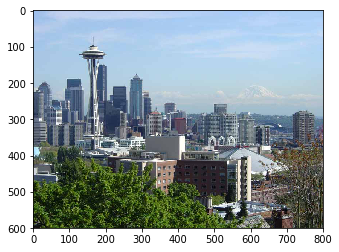

In [3]:
im = Image.open('hw1_data/Seattle.jpg')
plt.imshow(im)

## Output Image after applying filter

CPU times: user 17.6 s, sys: 74.1 ms, total: 17.6 s
Wall time: 17.9 s


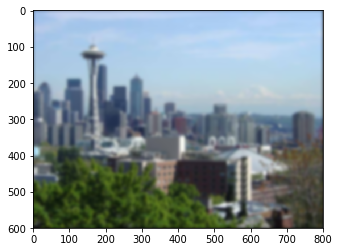

In [5]:
%%time
a = GaussianBlurImage('hw1_data/Seattle.jpg', 4)
plt.imshow(a)
plt.imsave('1.png',a )